In [10]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject

In [11]:
using CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [12]:
function reshape2d_4d(img::AbstractArray)
    reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

In [64]:
img = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
img = reshape2d_4d(img)
img = CuArray(img)
r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

In [65]:
tspan = (0.0f0, 100.0f0)
u0 = CuArray(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [66]:
x_lgn = CuArray(reshape(Array{Float32}(undef, p.dim_i, p.dim_j), p.dim_i, p.dim_j, 1,1))
# x_lgn = CuArray(reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, 1,1))
C = CuArray(reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1))
H_z = CuArray(reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1))


f = LaminartGPU.MyFunction(x_lgn, C, H_z)

(::MEngProject.LaminartGPU.MyFunction{CuArray{Float32,4,Nothing}}) (generic function with 1 method)

In [67]:
prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType CuArray{Float32,4,Nothing} and tType Float32. In-place: true
timespan: (0.0f0, 100.0f0)
u0: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [68]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.011110999
   0.111110985
   1.1111109
  11.11111
 100.0
u: 10-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.

In [69]:
@benchmark sol = solve(prob) 

BenchmarkTools.Trial: 
  memory estimate:  64.29 MiB
  allocs estimate:  288490
  --------------
  minimum time:     227.190 ms (0.00% GC)
  median time:      254.062 ms (5.71% GC)
  mean time:        246.230 ms (3.37% GC)
  maximum time:     277.600 ms (5.44% GC)
  --------------
  samples:          21
  evals/sample:     1

In [70]:
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.011110999
   0.111110985
   1.1111109
  11.11111
 100.0
u: 10-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.

In [99]:
Utils.plot_rb(Array(sol(100)[:,:,1,1]), "img", false)


MethodError: MethodError: no method matching plot_rb(::Array{Float32,2}, ::String, ::Bool)
Closest candidates are:
  plot_rb(::AbstractArray; name, save, axMin, axMax, clbar, loc, filetype) at /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/Utils.jl:22

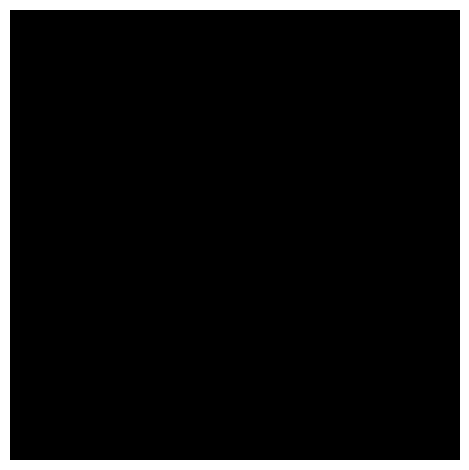

In [100]:
Utils.plot_gs(Array(sol(100)[:,:,10,1]), save=false)

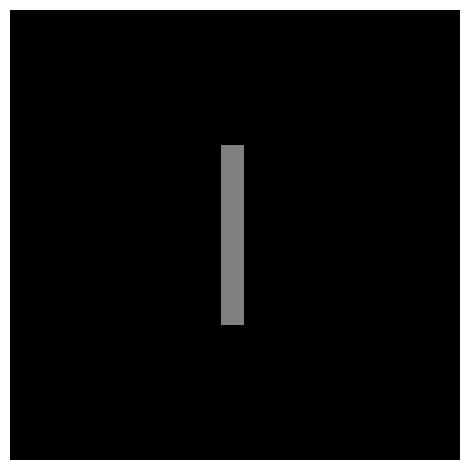

In [110]:
Utils.plot_gs(img[:,:,1,1], name="img", save=false)

In [109]:
size(img)

(100, 100, 1, 1)

In [105]:
findmax(sol(4))

(0.0f0, CartesianIndex(1, 1, 1, 1))

In [ ]:
function plot_gs_(img::AbstractArray;  name="img", save = true, axMin = 0, axMax = 2, clbar=false,  loc=location, filetype=".png")
    findmax(img)[1] > axMax && throw(ArgumentError(string("Image has max ", findmax(img)[1], ",outside range")))
    findmin(img)[1] < axMin && throw(ArgumentError(string("Image has min ", findmin(img)[1], ",outside range")))
    fig, ax = plt.subplots()

    im = ax.imshow(img, cmap=matplotlib.cm.gray,
               vmax=axMax, vmin=axMin)
    if clbar
        cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
    end

    plt.axis("off")
    fig.tight_layout()
    plt.show()
    if save
        plt.savefig(string(loc,name,filetype))
    end
end

In [21]:
u = u0;
du = u0;
        x = CuArray(@view u[:, :, 1:p.K,:])
        y = CuArray(@view u[:, :, p.K+1:2*p.K,:])
        m = CuArray(@view u[:, :, 2*p.K+1:3*p.K,:])
        z = CuArray(@view u[:, :, 3*p.K+1:4*p.K,:])
        s = CuArray(@view u[:, :, 4*p.K+1:5*p.K,:])

        #    C = @view u[:, :, 5*p.K+1:6*p.K]
        #    H_z = @view u[:, :, 6*p.K+1:7*p.K]
#  x_lgn = @view u[:, :, 1:1,:]
        v_p = CuArray(@view u[:, :, 5*p.K+1:5*p.K+1,:])
        v_m = CuArray(@view u[:, :, 5*p.K+2:5*p.K+2,:])
        #    x_lgn = @view u[:, :, 7*p.K+3]

        dx = CuArray(@view du[:, :, 1:p.K,:])
        dy = CuArray(@view du[:, :, p.K+1:2*p.K,:])
        dm = CuArray(@view du[:, :, 2*p.K+1:3*p.K,:])
        dz = CuArray(@view du[:, :, 3*p.K+1:4*p.K,:])
        ds = CuArray(@view du[:, :, 4*p.K+1:5*p.K,:])

        dv_p = CuArray(@view du[:, :, 5*p.K+1:5*p.K+1,:])
        dv_m = CuArray(@view du[:, :, 5*p.K+2:5*p.K+2,:]);

In [22]:
LaminartGPU.fun_x_lgn!(x_lgn, x, p)

In [23]:
LaminartGPU.fun_v_C!(C, v_p, v_m, p)

In [24]:
LaminartGPU.fun_H_z!(H_z, z, p)

In [25]:
LaminartGPU.fun_dv!(dv_p, v_p, p.r, x_lgn, p)

In [ ]:
@benchmark xx = CuArray(@view x_lgn[:,:,1:1,:])

In [ ]:
@benchmark xxx = @view x_lgn[:,:,1:1,:]

In [26]:
LaminartGPU.fun_dv!(dv_m, v_m, .-p.r, x_lgn, p)

In [35]:
LaminartGPU.fun_dx_v1!(dx, x, C, z, p.x_V2, p)

((100, 100, 2, 1), (100, 100, 2, 1), (100, 100, 2, 1), (100, 100, 2, 1), (100, 100, 2, 1, 1))

In [55]:
LaminartGPU.fun_dy!(dy, y, C, x, m, p)

In [56]:
LaminartGPU.fun_dm!(dm, m, x, p)

In [57]:
LaminartGPU.fun_dz!(dz, z, y, H_z, s, p)

In [58]:
LaminartGPU.fun_ds!(ds, s, H_z, p)